# 1. Preprocessing

# 1.1. Extracting the data

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from hyperopt import fmin, tpe, hp

from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, roc_curve, auc

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img

os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [2]:
# Define the path to the directory containing images
# dataset_path = "Three Channels/Factin"
dataset_path = "Manually extracted JPEG"
# dataset_path = "Extracted Cells"


# Load the dataset
# Assuming images are organized in subdirectories where each subdirectory name is the class label
dataset = image_dataset_from_directory(
    dataset_path,
    batch_size=32,  # Batch size
    image_size=(600, 400),
    label_mode='int',  # Use integer labels
    shuffle=True  # Shuffle the dataset
)

# To inspect the dataset
for images, labels in dataset.take(1):
    print(images.shape)  # (batch_size, 32, 32, 1)
    print(labels.shape)  # (batch_size,)

Found 206 files belonging to 2 classes.


2024-08-26 18:02:37.928242: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-26 18:02:37.928303: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-26 18:02:37.928307: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-26 18:02:37.928333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-26 18:02:37.928353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(32, 600, 400, 3)
(32,)


2024-08-26 18:02:38.361954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


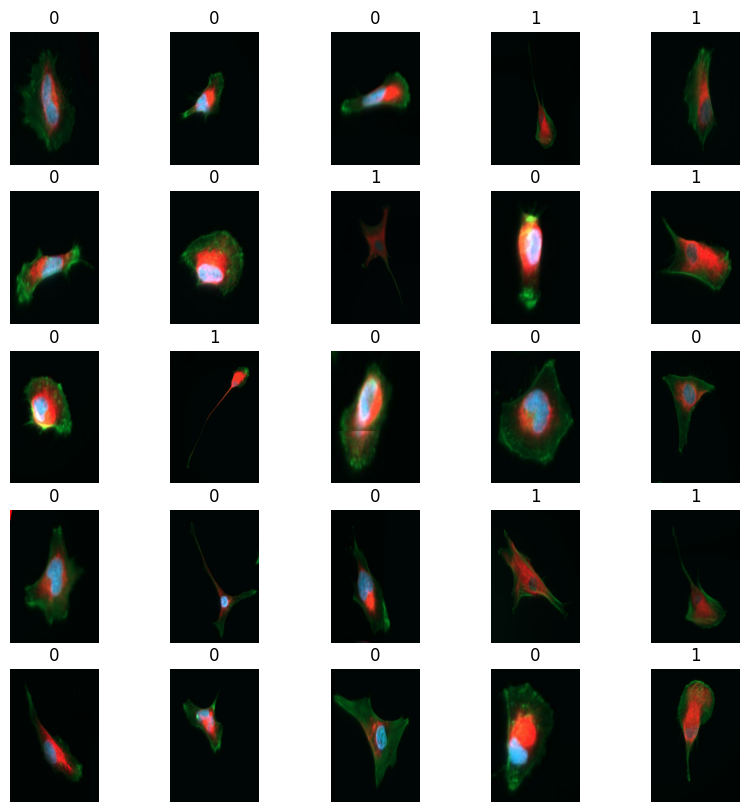

2024-08-26 18:02:39.579742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [3]:
# Take one batch from the dataset
for images, labels in dataset.take(1):
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8").squeeze(), cmap='gray')
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()

In [5]:
# Extract the  training input images and output class labels
x = []
y = []

"""The take method is used to create a new dataset containing a specified number of elements from the original dataset.
When -1 is provided as the argument, it essentially means "take all elements" from the original dataset."""
for images, labels in dataset.take(-1):
    x.append(images.numpy())
    y.append(labels.numpy())

# axis=0 means the arrays will be concatenated along the first axis (i.e., rows will be stacked vertically).
x = np.concatenate(x, axis=0)
y = np.concatenate(y, axis=0)

2024-08-26 18:02:58.726194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
print(x[0].shape)
print(y.shape)

(600, 400, 3)
(206,)


In [7]:
print(x[0].nbytes)

2880000


# 1.1.2. Other way to extract the data

In [ ]:
# Define the directory containing the images
image_dir = "Extracted Cells/Extracted Individual Cells BJprimary"

# List to store the images
x_0 = []
class_0 = []
# Iterate through all files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):  # You can add more extensions if needed
        img_path = os.path.join(image_dir, filename)
        image = np.array(load_img(img_path, target_size=(224, 224, 3)))
        x_0.append(image)
        class_0.append(0)

# Convert the list of images to a numpy array
x_0 = np.array(x_0)
class_0 = np.array(class_0)

print(f"Loaded {len(x_0)} images.")

In [ ]:
# Define the directory containing the images
image_dir = "Extracted Cells/Extracted Indiviual Cells BJhtert"

# List to store the images
x_1 = []
class_1 = []
# Iterate through all files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):  # You can add more extensions if needed
        img_path = os.path.join(image_dir, filename)
        image = np.array(load_img(img_path, target_size=(224, 224, 3)))
        x_1.append(image)
        class_1.append(1)

# Convert the list of images to a numpy array
x_1 = np.array(x_1)
class_1 = np.array(class_1)

print(f"Loaded {len(x_1)} images.")

In [ ]:
x = np.concatenate([x_0, x_1], axis=0)
y = np.concatenate((class_0, class_1), axis=0)

In [ ]:
print(x[3].nbytes)

# 1.2.1 Visualise the data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
x.shape

In [ ]:
# Step 1: Flatten the images
num_samples, height, width, channels = x.shape
x_flattened = x.reshape(num_samples, height * width * channels)

# Step 2: Standardize the data
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_flattened)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
x_pca = pca.fit_transform(x_standardized)

In [ ]:
# Step 4: Plotting the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Image Data')
plt.show()

# 1.2.2 Data processing

In [ ]:
# Normalize images to range [0, 1] for CLAHE
x = x / 255.0

# Apply histogram equalization
equalized_images = []
for img in x:   
    # Apply histogram equalization
    equalized_img = exposure.equalize_adapthist(img, clip_limit=0.01)
    equalized_images.append(equalized_img)

# Convert the list back to a numpy array
equalized_images = np.array(equalized_images)

print(f"Applied histogram equalization to {len(equalized_images)} images.")

In [ ]:
# Create a figure with a specific size
plt.figure(figsize=(15, 5))

num_images = 6

# Display equalized images starting from the last one
for i in range(num_images):
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(equalized_images[-(i + 1)])  # Start from the last image
    plt.title("Equalized")
    plt.axis('off')

# Display original images starting from the last one
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x[-(i + 1)])  # Start from the last image
    plt.title("Original")
    plt.axis('off')

# Show the plot
plt.show()

# 1.3. Data Augmentation

In [ ]:
# Extract data for class 0
x_class_0 = equalized_images[y == 0]
y_class_0 = y[y == 0]

# Extract data for class 1
x_class_1 = equalized_images[y == 1]
y_class_1 = y[y == 1]

In [ ]:
# Extract data for class 0
x_class_0 = x[y == 0]
y_class_0 = y[y == 0]

# Extract data for class 1
x_class_1 = x[y == 1]
y_class_1 = y[y == 1]

In [ ]:
# just for the manually extracted
x_class_0, x_class_1 = (x_class_1, x_class_0)
y_class_0, y_class_1 = (y_class_1, y_class_0)

In [ ]:
print(x_class_1.shape, x_class_0.shape)

In [ ]:
x_class_1 = x_class_1[:75]
y_class_1 = y_class_1[:75]

In [ ]:
x_class_1 = x_class_1[:138]
y_class_1 = y_class_1[:138]

In [ ]:
print(x_class_1.shape, x_class_0.shape)

# 1.3.1. Random Rotations

Method_1:

In [ ]:
# Define the ImageDataGenerator with the desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    
    rescale=1./255,          # Scaling pixel values to the range [0, 1]
    
    horizontal_flip=True,
    fill_mode='constant',    # Constant fill mode
    cval=0                   # Constant value for padding
)

# Initialize an empty list to store the augmented images
augmented_images = []

# Number of variations to generate per image
num_variations_per_image = 3

# Counter to track the number of augmented images generated per image
counter = {i: 0 for i in range(len(x_class_0))}

for batch in datagen.flow(x_class_0, batch_size=2):
    for i in range(len(batch)):
        # Append the augmented image to the list
        augmented_images.append(batch[i])

        # Update the counter for the specific image
        image_index = (len(augmented_images) - 1) % len(x_class_0)
        counter[image_index] += 1
        
        # Check if we have generated enough variations for this image
        if counter[image_index] >= num_variations_per_image:
            continue
    
    # Check if we have generated enough variations for all images
    if all(count >= num_variations_per_image for count in counter.values()):
        break

print(f"{len(augmented_images)} augmented images have been generated.")

In [ ]:
np.array(augmented_images).shape

In [ ]:
# Create a figure with a specific size
plt.figure(figsize=(15, 5))

num_images = 6
# Display equalized images
for i in range(num_images):
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(x_class_0[i])
    plt.title("Original")
    plt.axis('off')

# Display original images
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(augmented_images[i])
    plt.title("Augmented")
    plt.axis('off')
    
# Show the plot
plt.show()

Method_2:

In [ ]:
# def apply_random_rotation(image):
#     # Randomly generate a rotation angle between -10 and 10 degrees
#     angle = np.random.randint(40, 90)
#     # Get image height and width
#     h, w = image.shape[:2]
#     # Calculate the rotation matrix
#     M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1.0)
#     # Perform the actual rotation and return the rotated image
#     rotated_image = cv2.warpAffine(image, M, (w, h))
#     return rotated_image

In [ ]:
# # Example loop to apply rotation to each image in x_class_0
# rotated_images = []
# for img in x_class_0:
#     rotated_img = apply_random_rotation(img)
#     rotated_images.append(rotated_img)

In [ ]:
# # Create a figure with a specific size
# plt.figure(figsize=(15, 5))

# num_images = 6
# # Display equalized images
# for i in range(num_images):
#     plt.subplot(2, num_images, i + 1 + num_images)
#     plt.imshow(x_class_0[i])
#     plt.title("Original")
#     plt.axis('off')

# # Display original images
# for i in range(num_images):
#     plt.subplot(2, num_images, i + 1)
#     plt.imshow(rotated_images[i])
#     plt.title("Augmented")
#     plt.axis('off')
    
# # Show the plot
# plt.show()

In [ ]:
# rotated_images = np.array(rotated_images)
# rotated_images.shape

# 1.3.2. Horizontal and Vertical Flipping

In [ ]:
# # Function to flip images horizontally and vertically
# def flip_images(images):
#     flipped_images = []
#     for img in images:
#         h_flip = cv2.flip(img, 1)  # Horizontal flip
#         v_flip = cv2.flip(img, 0)  # Vertical flip
#         flipped_images.extend([h_flip, v_flip])
#     return flipped_images

In [ ]:
# # Example loop to apply rotation to each image in x_class_1
# flipped_images = flip_images(x_class_0)
# print(np.array(flipped_images).shape)

# 1.3.3. Shearing

In [ ]:
# def shear_image(image, shear_factor_x, shear_factor_y):
#     # Get original dimensions
#     (height, width) = image.shape[:2]
    
#     # Define the shearing matrix
#     shear_matrix = np.array([[1, shear_factor_x, 0],
#                              [shear_factor_y, 1, 0]], dtype=np.float32)

#     # Calculate new bounding box
#     # We need to compute the new corners after shearing
#     corners = np.array([[0, 0], [width, 0], [0, height], [width, height]], dtype=np.float32)
#     new_corners = cv2.transform(np.array([corners]), shear_matrix)[0]
    
#     # Find the min and max coordinates for the new bounding box
#     min_x = min(new_corners[:, 0])
#     max_x = max(new_corners[:, 0])
#     min_y = min(new_corners[:, 1])
#     max_y = max(new_corners[:, 1])
    
#     # Calculate new width and height
#     new_width = int(max_x - min_x)
#     new_height = int(max_y - min_y)
    
#     # Update the shear matrix to adjust for the new bounding box
#     shear_matrix_adjusted = np.array([[1, shear_factor_x, -min_x],
#                                       [shear_factor_y, 1, -min_y]], dtype=np.float32)
    
#     # Apply the adjusted shearing transformation
#     sheared_image = cv2.warpAffine(image, shear_matrix_adjusted, (width, height))

#     return sheared_image

In [ ]:
# # Example loop to apply rotation to each image in x_class_0
# sheared_images = []

# for img in flipped_images:
#     # Generate random shearing factors within a specified range
#     shear_factor_x = 0.2  # Random shear factor for x-axis
#     shear_factor_y = 0.2 # Random shear factor for y-axis

#     sheared_img = shear_image(img, shear_factor_x, shear_factor_y)
#     sheared_images.append(sheared_img)

In [ ]:
# # Create a figure with a specific size
# plt.figure(figsize=(15, 5))

# num_images = 6
# # Display equalized images
# for i in range(num_images):
#     plt.subplot(2, num_images, i + 1 + num_images)
#     plt.imshow(flipped_images[i])
#     plt.title("Original")
#     plt.axis('off')

# # Display original images
# for i in range(num_images):
#     plt.subplot(2, num_images, i + 1)
#     plt.imshow(sheared_images[i])
#     plt.title("Augmented")
#     plt.axis('off')
    
# # Show the plot
# plt.show()

In [ ]:
# print(np.array(sheared_images).shape)

# 1.4. Combine the features

In [ ]:
print(x_class_0.shape, x_class_1.shape)

In [ ]:
# x = np.concatenate([x_class_1, x_class_0, np.array(sheared_images), rotated_images], axis=0)
# y = np.concatenate((y_class_1, y_class_0, y_class_0, y_class_0, y_class_0), axis=0)

# x = np.concatenate([x_class_1[400:], x_class_0, np.array(sheared_images)], axis=0)
# y = np.concatenate((y_class_1[400:], y_class_0, y_class_0, y_class_0), axis=0)

# x = np.concatenate([x_class_1[750:], x_class_0], axis=0)
# y = np.concatenate((y_class_1[750:], y_class_0), axis=0)

x = np.concatenate([x_class_1, x_class_0, augmented_images], axis=0)
y = np.concatenate((y_class_1, y_class_0, np.tile(y_class_0, num_variations_per_image)), axis=0)

In [ ]:
x = np.concatenate([x_class_1, x_class_0], axis=0)
y = np.concatenate((y_class_1, y_class_0), axis=0)

In [ ]:
print(x.shape, y.shape)

In [ ]:
print(y[y==0].shape, y[y==1].shape)

# 1.5. Training and testing data

In [8]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, {y_test.shape}")

Training data shape: (164, 600, 400, 3), (164,)
Testing data shape: (42, 600, 400, 3), (42,)


# 2. Model architecture

# 2.1. Basic model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Softmax, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  # Import l2 regularizer

In [10]:
def create_model(num_layers=4, filters=(32, 64, 128), dropout_rate=0.25, learning_rate=0.001, weight_decay=0.001):
    model = Sequential()

    model.add(Conv2D(filters[0], kernel_size=(3, 3), padding='same', input_shape=(600, 400, 3), kernel_regularizer=l2(weight_decay)))  # Add L2 to kernel
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    for i in range(num_layers-1):
        model.add(Conv2D(filters[1], kernel_size=(3, 3), padding='same', kernel_regularizer=l2(weight_decay)))  # Add L2 to all convolutional layers
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Conv2D(filters[2], kernel_size=(3, 3), padding='same', kernel_regularizer=l2(weight_decay)))  # Add L2 to the last convolutional layer
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size =(12, 1), strides=(1, 1), padding = 'same'))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())

    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def create_model(num_layers=4, filters=(32, 64, 128), dropout_rate=0.25, learning_rate=0.001, weight_decay=0.001):
    input_layer = Input(shape=(600, 400, 3))
    
    x = Conv2D(filters[0], kernel_size=(3, 3), padding='same', kernel_regularizer=l2(weight_decay))(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)

    for i in range(num_layers - 1):
        x = Conv2D(filters[1], kernel_size=(3, 3), padding='same', kernel_regularizer=l2(weight_decay))(x)
        x = BatchNormalization()(x) 
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)

    x = Conv2D(filters[2], kernel_size=(3, 3), padding='same', kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 1), strides=(1, 1), padding='same')(x)
    x = Dropout(dropout_rate)(x)

    x = GlobalAveragePooling2D()(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
print(y_test[y_test==1].shape)

In [ ]:
model_1 = create_model(num_layers=2, filters=(8, 16, 32), dropout_rate=0, weight_decay=0)

# Train the model
model_1.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.5)

/Users/ameeralwadiya/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15


In [ ]:
model_1.summary()

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

predicted_probs = model_1.predict(x_test)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()

ROC Curve:

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The performance metrics:

In [ ]:
# Calculate metrics
recall = recall_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
auc_roc_macro = roc_auc_score(y_test, predicted_probs)
auc_roc_micro = roc_auc_score(y_test, predicted_probs)
auc_roc_weighted = roc_auc_score(y_test, predicted_probs)
f1_sample = f1_score(y_test, predicted_labels, average='binary')
f1_macro = f1_score(y_test, predicted_labels, average='macro')
f1_micro = f1_score(y_test, predicted_labels, average='micro')
f1_weighted = f1_score(y_test, predicted_labels, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC-ROC Macro: {auc_roc_macro:.4f}")
print(f"AUC-ROC Micro: {auc_roc_micro:.4f}")
print(f"AUC-ROC Weighted: {auc_roc_weighted:.4f}")
print(f"F1 Sample: {f1_sample:.4f}")
print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")

In [ ]:
print(f"{recall:.4f}")
print(f"{precision:.4f}")
print(f"{auc_roc_macro:.4f}")
print(f"{auc_roc_micro:.4f}")
print(f"{auc_roc_weighted:.4f}")
print(f"{f1_sample:.4f}")
print(f"{f1_macro:.4f}")
print(f"{f1_micro:.4f}")
print(f"{f1_weighted:.4f}")

# 2.2. Optimization

In [ ]:
import numpy as np
from hyperopt import fmin, tpe, hp
# fmin: Stands for "Function Minimization".
# tpe: Stands for "Tree-structured Parzen Estimator".
# hp: Stands for "Hyperparameters".

# Define the search space
space = {
    'num_layers': hp.choice('num_layers', [2, 3, 4, 6]),
    'filters': hp.choice('filters', [(8, 16, 32), (16, 32, 64), (32, 64, 128), (64, 128, 256)]),

    'dropout_rate': hp.choice('dropout_rate', [0.0, 0.1, 0.15, 0.2]),
    'weight_decay': hp.choice('weight_decay', [0.0, 0.1, 0.01, 0.001]),
}

# Define the objective function
def objective(params):
    model = create_model(**params)  # Create model with current parameters

    # Train the model and evaluate on the test set
    model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.5)
    loss, accuracy = model.evaluate(x_test, y_test)
    return {'loss': -accuracy, 'status': 'ok'}

# Run the optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20)

print("Best parameters found:")
print(best)

# 4. Test some pretrained models

# 4.1. ResNet50

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=x.shape[1:])

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fine-tuning a pretrained model (ResNet50) and training new layers specifically
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=callbacks
)

In [ ]:
print(x.shape)

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# If you want to evaluate on the training set as well:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=1)

print(f'Training Loss: {train_loss}')
print(f'Training Accuracy: {train_accuracy}')

In [ ]:
predicted_probs = model.predict(x_test)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()

In [ ]:
predicted_probs.shape

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate metrics
recall = recall_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
auc_roc_macro = roc_auc_score(y_test, predicted_probs)
auc_roc_micro = roc_auc_score(y_test, predicted_probs)
auc_roc_weighted = roc_auc_score(y_test, predicted_probs)
f1_sample = f1_score(y_test, predicted_labels, average='binary')
f1_macro = f1_score(y_test, predicted_labels, average='macro')
f1_micro = f1_score(y_test, predicted_labels, average='micro')
f1_weighted = f1_score(y_test, predicted_labels, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC-ROC Macro: {auc_roc_macro:.4f}")
print(f"AUC-ROC Micro: {auc_roc_micro:.4f}")
print(f"AUC-ROC Weighted: {auc_roc_weighted:.4f}")
print(f"F1 Sample: {f1_sample:.4f}")
print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")

In [ ]:
print(f"{recall:.4f}")
print(f"{precision:.4f}")
print(f"{auc_roc_macro:.4f}")
print(f"{auc_roc_micro:.4f}")
print(f"{auc_roc_weighted:.4f}")
print(f"{f1_sample:.4f}")
print(f"{f1_macro:.4f}")
print(f"{f1_micro:.4f}")
print(f"{f1_weighted:.4f}")

# 4.2. VGG-16

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Load the VGG-16 model, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x.shape[1:])

# Create a Sequential model
model = Sequential()

# Add the VGG-16 model layers to the Sequential model
for layer in base_model.layers:
    model.add(layer)

# Freeze the layers of VGG-16
for layer in model.layers:
    layer.trainable = False

# Add custom layers for binary classification
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Callbacks for early stopping and saving the best model
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[checkpoint, early_stopping]
)

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# If you want to evaluate on the training set as well:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=1)

print(f'Training Loss: {train_loss}')
print(f'Training Accuracy: {train_accuracy}')

In [ ]:
predicted_probs = model.predict(x_test)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate metrics
recall = recall_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
auc_roc_macro = roc_auc_score(y_test, predicted_probs)
auc_roc_micro = roc_auc_score(y_test, predicted_probs)
auc_roc_weighted = roc_auc_score(y_test, predicted_probs)
f1_sample = f1_score(y_test, predicted_labels, average='binary')
f1_macro = f1_score(y_test, predicted_labels, average='macro')
f1_micro = f1_score(y_test, predicted_labels, average='micro')
f1_weighted = f1_score(y_test, predicted_labels, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC-ROC Macro: {auc_roc_macro:.4f}")
print(f"AUC-ROC Micro: {auc_roc_micro:.4f}")
print(f"AUC-ROC Weighted: {auc_roc_weighted:.4f}")
print(f"F1 Sample: {f1_sample:.4f}")
print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")